In [17]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000022F92601670>: Failed to resolve 'pro-api.coinmarketcap.com' ([Errno 11001] getaddrinfo failed)"))


In [3]:
type(data)

dict

In [19]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981974e+07,1.981974e+07,False,NaN,1,NaN,NaN,None,2025-02-04T21:30:00.000Z,97262.922468,7.082438e+10,-40.4760,-1.073354,-3.930041,-4.109048,-1.036595,-3.922654,28.266870,1.927726e+12,60.3982,2.042521e+12,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205239e+08,1.205239e+08,True,NaN,2,NaN,NaN,None,2025-02-04T21:30:00.000Z,2702.100566,4.965788e+10,-47.4877,-1.426340,-0.687829,-12.781395,-25.752999,-33.442644,0.520605,3.256678e+11,10.1730,3.256678e+11,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,None,2025-02-04T21:30:00.000Z,2.502867,1.366163e+10,-64.2914,-2.368225,-7.048758,-19.128888,4.305722,4.621754,361.395552,1.444248e+11,4.5177,2.502867e+11,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
3,825,Tether USDt,USDT,tether,115463,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.404787e+11,1.425729e+11,True,NaN,4,NaN,NaN,None,2025-02-04T21:30:00.000Z,1.000302,1.546954e+11,-48.4665,0.003709,-0.041866,0.081055,0.048284,-0.155226,-0.063465,1.405212e+11,4.3895,1.426160e+11,None,2025-02-04T21:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-04 15:48:39.170976
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.870605e+08,5.933968e+08,True,NaN,5,NaN,NaN,None,2025-02-04T21:30:00.000Z,205.269633,7.393097e+09,-53.5279,-0.726302,-3.880919,-10.469885,-3.755202,-14.210779,8.990759,9.997873e+10,3.1274,1.218063e+11,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424804e+08,1.424804e+08,False,NaN,6,NaN,NaN,None,2025-02-04T21:30:00.000Z,566.473171,2.291063e+09,-43.6290,-1.078995,-6.326371,-15.083017,-19.866188,-23.593033,-3.843581,8.071133e+10,2.5247,8.071133e+10,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
6,3408,USDC,USDC,usd-coin,25458,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.502116e+10,5.502116e+10,False,NaN,7,NaN,NaN,None,2025-02-04T21:30:00.000Z,1.000061,1.436216e+10,-46.9369,0.020023,0.014596,0.010679,0.009248,0.013716,0.009867,5.502451e+10,1.7212,5.502451e+10,None,2025-02-04T21:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-04 15:48:39.170976
7,74,Dogecoin,DOGE,dogecoin,1160,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.479106e+11,1.479106e+11,True,NaN,8,NaN,NaN,None,2025-02-04T21:30:00.000Z,0.260334,4.474148e+09,-60.9302,-0.871337,-7.351836,-19.241725,-31.893278,-40.732796,33.394991,3.850612e+10,1.2028,3.850612e+10,None,2025-02-04T21:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 15:48:39.170976
8,2010,Cardano,ADA,cardano,1456,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contra

In [38]:

def api_runner():
    global df

    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r"C:\Users\charl\OneDrive\Documents\Python Tutorials\API.csv"):
        df.to_csv(r'C:\Users\charl\OneDrive\Documents\Python Tutorials\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\charl\OneDrive\Documents\Python Tutorials\API.csv', mode = 'a', header = False)

        

# If that didn't work try using the local host URL as shown in the video

In [40]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed


KeyboardInterrupt: 

In [42]:
df72 = pd.read_csv(r"C:\Users\charl\OneDrive\Documents\Python Tutorials\API.csv")
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981974e+07,1.981974e+07,False,NaN,1,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,96406.789167,6.889798e+10,-42.1005,-1.537405,-5.529106,-4.088006,-2.034784,-4.347065,26.772356,1.910758e+12,60.5634,2.024543e+12,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
1,1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205239e+08,1.205239e+08,True,NaN,2,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,2647.595529,4.961310e+10,-47.5242,-2.039955,-7.234479,-13.197771,-27.263095,-34.467628,-1.670685,3.190987e+11,10.1144,3.190987e+11,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
2,2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,2.464724,1.400058e+10,-63.3314,-1.823453,-8.804482,-18.992551,2.995433,3.557173,353.505801,1.422238e+11,4.5081,2.464724e+11,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
3,3,825,Tether USDt,USDT,tether,115464,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.404787e+11,1.425729e+11,True,NaN,4,NaN,NaN,NaN,2025-02-04T22:06:00.000Z,1.000007,1.549453e+11,-48.5950,-0.038392,-0.090166,0.026236,0.021325,-0.153701,-0.062226,1.404797e+11,4.4484,1.425738e+11,NaN,2025-02-04T22:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-04 16:08:24.027270
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.870589e+08,5.933965e+08,True,NaN,5,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,203.617431,7.394601e+09,-53.5945,-0.572562,-6.094202,-9.834824,-4.693871,-14.639534,7.694132,9.917368e+10,3.1441,1.208259e+11,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
5,5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424804e+08,1.424804e+08,False,NaN,6,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,560.285241,2.303291e+09,-43.7383,-0.873551,-9.032123,-15.299188,-20.786037,-23.725076,-5.308457,7.982967e+10,2.5304,7.982967e+10,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
6,6,3408,USDC,USDC,usd-coin,25458,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.503727e+10,5.503727e+10,False,NaN,7,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,1.000066,1.446619e+10,-44.7456,-0.004184,0.006621,0.022601,0.005509,0.018136,0.014859,5.504089e+10,1.7450,5.504089e+10,NaN,2025-02-04T22:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-04 16:08:24.027270
7,7,74,Dogecoin,DOGE,dogecoin,1160,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.479109e+11,1.479109e+11,True,NaN,8,NaN,NaN,NaN,2025-02-04T22:07:00.000Z,0.258278,4.451541e+09,-61.4105,-0.390974,-10.865172,-18.475954,-32.305239,-40.755872,30.286888,3.820209e+10,1.2109,3.820209e+10,NaN,2025-02-04T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:08:24.027270
8,8,2010,Cardano,ADA,cardano,1456,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 

In [46]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [53]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19819743.00000,19819743.00000,False,NaN,1,NaN,NaN,None,2025-02-04T22:08:00.000Z,96321.29474,68845374913.99269,-42.16230,-1.61474,-5.72063,-4.24606,-2.13003,-4.43078,26.71507,1909063307215.34131,60.50970,2022747189583.75000,None,2025-02-04T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:09:24.495585
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120523942.30417,120523942.30417,True,NaN,2,NaN,NaN,None,2025-02-04T22:08:00.000Z,2642.79697,45108976033.11150,-52.44440,-2.16573,-7.36403,-13.31386,-27.40115,-34.56954,-1.87392,318520309644.80603,10.09610,318520309644.81000,None,2025-02-04T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:09:24.495585
2,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57703732191.00000,99986541057.00000,False,NaN,3,NaN,NaN,None,2025-02-04T22:08:00.000Z,2.46141,14005828386.33070,-63.32450,-1.93150,-8.94357,-19.12373,2.86412,3.39911,352.91001,142032767386.01974,4.50290,246141388075.01999,None,2025-02-04T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:09:24.495585
3,825,Tether USDt,USDT,tether,115464,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,140478740215.59610,142572893899.84949,True,NaN,4,NaN,NaN,None,2025-02-04T22:08:00.000Z,1.00018,151536674480.67151,-49.79370,-0.01663,-0.06870,0.07184,0.03521,-0.14435,-0.07867,140503749033.40680,4.45350,142598275530.70999,None,2025-02-04T22:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-04 16:09:24.495585
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487058879.95453,593396467.12441,True,NaN,5,NaN,NaN,None,2025-02-04T22:08:00.000Z,203.50282,7392257295.63791,-53.61430,-0.65223,-6.19305,-9.88852,-4.75469,-14.68580,7.62948,99117856240.58463,3.14230,120757855246.57001,None,2025-02-04T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:09:24.495585
5,1839,BNB,BNB,bnb,2347,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480409.45000,142480409.45000,False,NaN,6,NaN,NaN,None,2025-02-04T22:08:00.000Z,560.14311,2304203711.50531,-43.72330,-0.88209,-9.04918,-15.30653,-20.80957,-23.74688,-5.32837,79809419611.08740,2.53020,79809419611.09000,None,2025-02-04T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-04 16:09:24.495585
6,3408,USDC,USDC,usd-coin,25458,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55037266924.53133,55037266924.53133,False,NaN,7,NaN,NaN,None,2025-02-04T22:08:00.000Z,0.99989,14208052923.38508,-45.77520,0.00238,-0.00958,0.00452,-0.01438,0.00141,0.00226,55031009799.86039,1.74460,55031009799.86000,None,2025-02-04T22:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-04 16:09:24.495585
7,74,Dogecoin,DOGE,dogecoin,1160,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147910936383.70520,147910936383.70520,True,NaN,8,NaN,NaN,None,2025-02-04T22:08:00.000Z,0.25814,4448320601.80848,-61.45610,-0.40369,-10.92151,-18.54402,-32.34010,-40.78899,29.99213,38182055409.26240,1.21020,38182055409.26000,None

In [57]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-1.61474,-5.72063,-4.24606,-2.13003,26.71507
Ethereum,-2.16573,-7.36403,-13.31386,-27.40115,-1.87392
XRP,-1.93150,-8.94357,-19.12373,2.86412,352.91001
Tether USDt,-0.01663,-0.06870,0.07184,0.03521,-0.07867
Solana,-0.65223,-6.19305,-9.88852,-4.75469,7.62948
BNB,-0.88209,-9.04918,-15.30653,-20.80957,-5.32837
USDC,0.00238,-0.00958,0.00452,-0.01438,0.00226
Dogecoin,-0.40369,-10.92151,-18.54402,-32.34010,29.99213
Cardano,-1.19416,-9.77188,-19.51162,-32.75050,102.68673


In [59]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.61474
             quote.USD.percent_change_24h    -5.72063
             quote.USD.percent_change_7d     -4.24606
             quote.USD.percent_change_30d    -2.13003
             quote.USD.percent_change_90d    26.71507
Ethereum     quote.USD.percent_change_1h     -2.16573
             quote.USD.percent_change_24h    -7.36403
             quote.USD.percent_change_7d    -13.31386
             quote.USD.percent_change_30d   -27.40115
             quote.USD.percent_change_90d    -1.87392
XRP          quote.USD.percent_change_1h     -1.93150
             quote.USD.percent_change_24h    -8.94357
             quote.USD.percent_change_7d    -19.12373
             quote.USD.percent_change_30d     2.86412
             quote.USD.percent_change_90d   352.91001
Tether USDt  quote.USD.percent_change_1h     -0.01663
             quote.USD.percent_change_24h    -0.06870
             quote.USD.percent_change_7d

In [61]:
type(df4)

pandas.core.series.Series

In [63]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -1.61474
            quote.USD.percent_change_24h  -5.72063
            quote.USD.percent_change_7d   -4.24606
            quote.USD.percent_change_30d  -2.13003
            quote.USD.percent_change_90d  26.71507
Ethereum    quote.USD.percent_change_1h   -2.16573
            quote.USD.percent_change_24h  -7.36403
            quote.USD.percent_change_7d  -13.31386
            quote.USD.percent_change_30d -27.40115
            quote.USD.percent_change_90d  -1.87392
XRP         quote.USD.percent_change_1h   -1.93150
            quote.USD.percent_change_24h  -8.94357
            quote.USD.percent_change_7d  -19.12373
            quote.USD.percent_change_30d   2.86412
            quote.USD.percent_change_90d 352.91001
Tether USDt quote.USD.percent_change_1h   -0.01663
            quote.USD.percent_change_24h  -0.06870
            quote.USD.percent_change_7d    0.07184
            quote.USD.percent_change_30d   0.03521
            quote.USD.percent_change_90d  -0.07867
Solana      quote.USD.percent_change_1h   -0.65223
            quote.USD.percent_change_24h  -6.19305
            quote.USD.percent_change_7d   -9.88852
            quote.USD.percent_change_30d  -4.75469
            quote.USD.percent_change_90d   7.62948
BNB         quote.USD.percent_change_1h   -0.88209
            quote.USD.percent_change_24h  -9.04918
            quote.USD.percent_change_7d  -15.30653
            quote.USD.percent_change_30d -20.80957
            quote.USD.percent_change_90d  -5.32837
USDC        quote.USD.percent_change_1h    0.00238
            quote.USD.percent_change_24h  -0.00958
            quote.USD.percent_change_7d    0.00452
            quote.USD.percent_change_30d  -0.01438
            quote.USD.percent_change_90d   0.00226
Dogecoin    quote.USD.percent_change_1h   -0.40369
            quote.USD.percent_change_24h -10.92151
            quote.USD.percent_change_7d  -18.54402
            quote.USD.percent_change_30d -32.34010
            quote.USD.percent_change_90d  29.99213
Cardano     quote.USD.percent_change_1h   -1.19416
            quote.USD.percent_change_24h  -9.77188
            quote.USD.percent_change_7d  -19.51162
            quote.USD.percent_change_30d -32.75050
            quote.USD.percent_change_90d 102.68673
TRON        quote.USD.percent_change_1h   -0.84121
            quote.USD.percent_change_24h  -3.21313
            quote.USD.percent_change_7d   -7.07845
            quote.USD.percent_change_30d -15.47937
            quote.USD.percent_change_90d  36.24904
Chainlink   quote.USD.percent_change_1h   -1.24934
            quote.USD.percent_change_24h -10.30988
            quote.USD.percent_change_7d  -13.75178
            quote.USD.percent_change_30d -16.95365
            quote.USD.percent_change_90d  60.55598
Sui         quote.USD.percent_change_1h   -0.59773
            quote.USD.percent_change_24h  -6.31623
            quote.USD.percent_change_7d   -3.88009
            quote.USD.percent_change_30d -32.93506
            quote.USD.percent_change_90d  52.69396
Avalanche   quote.USD.percent_change_1h   -1.14389
            quote.USD.percent_change_24h  -9.31334
            quote.USD.percent_change_7d  -19.20180
            quote.USD.percent_change_30d -39.12100
            quote.USD.percent_change_90d  -3.13478
Stellar     quote.USD.percent_change_1h   -1.66407
            quote.USD.percent_change_24h  -9.28393
            quote.USD.percent_change_7d  -14.48774
            quote.USD.percent_change_30d -23.59050
            quote.USD.percent_change_90d 246.33134
Hedera      quote.USD.percent_change_1h   -1.41559
            quote.USD.percent_change_24h -11.98821
            quote.USD.percent_change_7d  -17.52361
            quote.USD.percent_change_30d -18.39510
            quote.USD.percent_change_90d 400.55044

In [67]:
df5.count()

values    75
dtype: int64

In [69]:
index = pd.Index(range(75))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.61474
1,Bitcoin,quote.USD.percent_change_24h,-5.72063
2,Bitcoin,quote.USD.percent_change_7d,-4.24606
3,Bitcoin,quote.USD.percent_change_30d,-2.13003
4,Bitcoin,quote.USD.percent_change_90d,26.71507
5,Ethereum,quote.USD.percent_change_1h,-2.16573
6,Ethereum,quote.USD.percent_change_24h,-7.36403
7,Ethereum,quote.USD.percent_change_7d,-13.31386
8,Ethereum,quote.USD.percent_change_30d,-27.40115
9,Ethereum,quote.USD.percent_change_90d,-1.87392


In [77]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.61474
1,Bitcoin,quote.USD.percent_change_24h,-5.72063
2,Bitcoin,quote.USD.percent_change_7d,-4.24606
3,Bitcoin,quote.USD.percent_change_30d,-2.13003
4,Bitcoin,quote.USD.percent_change_90d,26.71507
5,Ethereum,quote.USD.percent_change_1h,-2.16573
6,Ethereum,quote.USD.percent_change_24h,-7.36403
7,Ethereum,quote.USD.percent_change_7d,-13.31386
8,Ethereum,quote.USD.percent_change_30d,-27.40115
9,Ethereum,quote.USD.percent_change_90d,-1.87392


In [81]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.61474
1,Bitcoin,24h,-5.72063
2,Bitcoin,7d,-4.24606
3,Bitcoin,30d,-2.13003
4,Bitcoin,90d,26.71507
5,Ethereum,1h,-2.16573
6,Ethereum,24h,-7.36403
7,Ethereum,7d,-13.31386
8,Ethereum,30d,-27.40115
9,Ethereum,90d,-1.87392


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

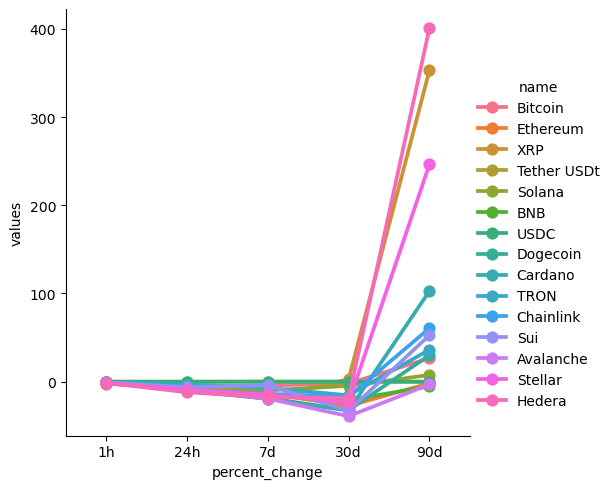

In [83]:
sns.catplot( x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [97]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,96321.29474,2025-02-04 16:09:24.495585
0,Bitcoin,96321.29474,2025-02-04 16:09:24.495585


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

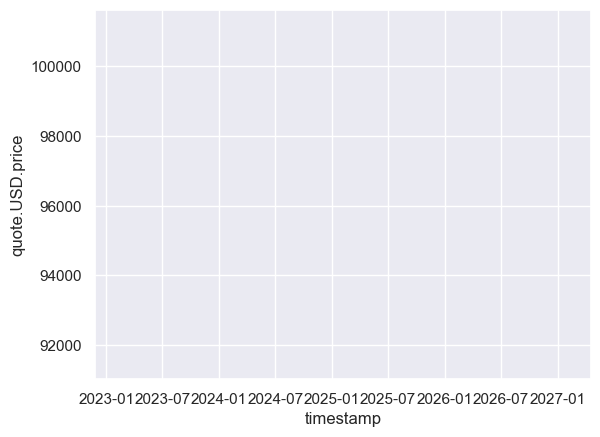